# Monty Hall Problem
### Proof by Simulation

In [1]:
import matplotlib.pyplot as plt
from random import shuffle, sample, choices
import seaborn

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
seaborn.set(font_scale=2.5)
seaborn.set_style("whitegrid")

In [4]:
def monty_hall(pick):
    """
    Runs one play of the famous Monty Hall game.
    """
    doors = {1: 'G', 2: 'G', 3: 'C'}
    doors_list = list(doors.items())
    shuffle(doors_list)
    doors = dict(doors_list)

    remaining = {k: v for k, v in doors.items() if k != pick}

    if "C" in list(remaining.values()):

        shown = [k for k, v in remaining.items() if v != 'C'][0]

    else:

        shown = sample([k for k, v in remaining.items()], 1)[0]

    pick_plus_shown = [pick, shown]

    switch_result = [v for k, v in doors.items() if k not in pick_plus_shown][0]
    return switch_result

In [5]:
def aggregate_monty_hall_results(nsim, func_monty_hall):
    """
    Executes nsim number of plays of the Monty Hall game
    and aggregates the results.
    """
    door_picks = choices([1, 2, 3], k=nsim)
    switch_results = list(map(func_monty_hall, door_picks))

    num_switch_winners = switch_results.count('C')
    proportion_switch_winners = num_switch_winners / nsim

    cumulative_percent_switch_winners = [
        switch_results[0:(i + 1)].count('C') / (i + 1) for i in range(nsim)
    ]
    
    return proportion_switch_winners, cumulative_percent_switch_winners

In [6]:
runs = 10000
simulations = 2500
target = 2 / 3

In [7]:
run_results = [
    aggregate_monty_hall_results(nsim=simulations, func_monty_hall=monty_hall) 
    for _ in range(runs)
]

run_results_list = list(map(list, zip(*run_results)))
proportion_switch_winners = run_results_list[0]
cumulative_percent_switch_winners = run_results_list[1]

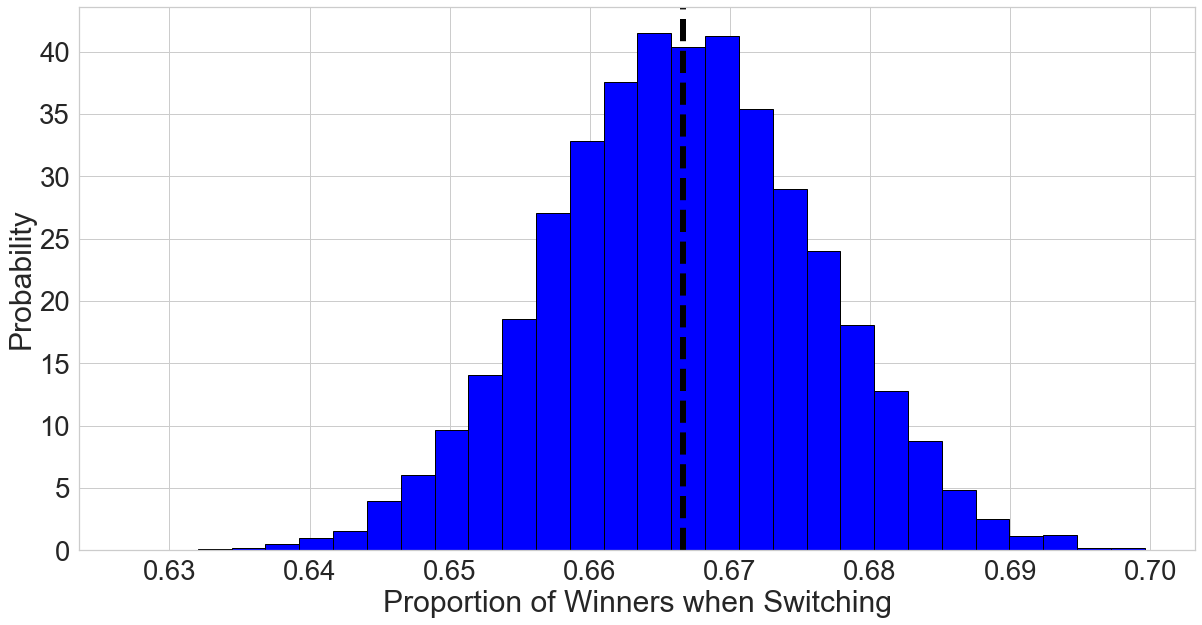

In [8]:
# histogram of switch winner proportion
plt.hist(proportion_switch_winners, density=True, bins=30, color='blue', edgecolor='black')
plt.axvline(x=target, linestyle='dashed', linewidth=6, color='black')
plt.xlabel('Proportion of Winners when Switching')
plt.ylabel('Probability')
plt.show(block=True)

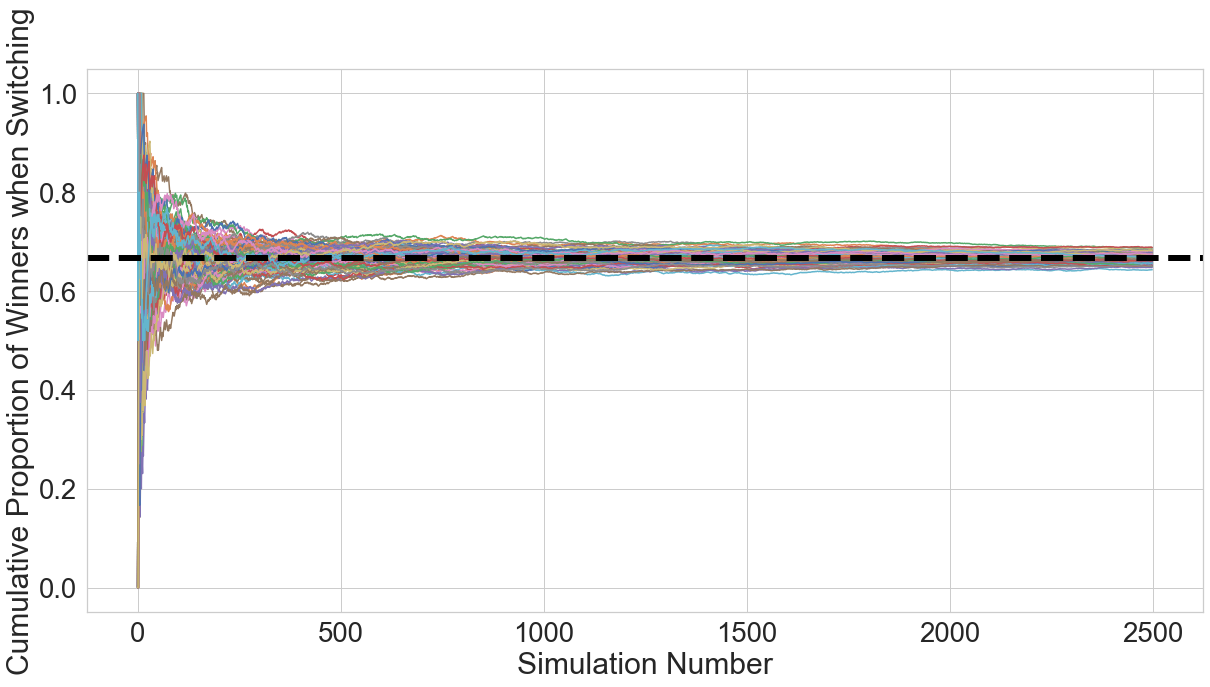

In [9]:
# simulation line plot
for i in range(len(cumulative_percent_switch_winners[0:100])):

    plt.plot(cumulative_percent_switch_winners[i])

plt.axhline(y=target, linestyle='dashed', linewidth=6, color='black')
plt.xlabel('Simulation Number')
plt.ylabel('Cumulative Proportion of Winners when Switching')
plt.show(block=True)